# Success of The Office episodes

In [1]:
# for dataframes
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
# for numerical arrays 
import numpy as np
# for linear models
from sklearn.linear_model import LinearRegression
# for normalizing data 
from sklearn.preprocessing import MinMaxScaler

**The data for the analysis was collected from [Kaggle](https://www.kaggle.com/) website.** [[3, 4 & 5]](#References)

In [2]:
office_episodes = pd.read_csv("the_office_episodes.csv")
office_imdb = pd.read_csv("the_office_imdb.csv")
office_series = pd.read_csv("the_office_series.csv")
office_lines = pd.read_csv("The-Office-Lines-V4.csv")

## Investigating the dataframes

In [3]:
# printing out the dataframe
office_episodes.head(5)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,2005-03-24,1001,11200000.0
1,1,2,2,Diversity Day,Ken Kwapis,B. J. Novak,2005-03-29,1002,6000000.0
2,1,3,3,Health Care,Ken Whittingham,Paul Lieberstein,2005-04-05,1006,5800000.0
3,1,4,4,The Alliance,Bryan Gordon,Michael Schur,2005-04-12,1004,5400000.0
4,1,5,5,Basketball,Greg Daniels,Greg Daniels,2005-04-19,1005,5000000.0


In [4]:
# printing out the dataframe
office_imdb.head(5)

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...


In [5]:
# printing out the dataframe
office_series.head(5)

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


I am deciding not to use office_episodes dataframe in the research since all the data are available in office_imdb and office_series dataframes. 

In [6]:
# printing the dataframe
office_lines.head(5)

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN


In [7]:
# episodes in which Michael has a line 
michael_in = office_lines[office_lines['speaker'] == 'Michael']
michael_in.head(10)

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN
5,1,1,Pilot,2,Michael,"Yes, I'd like to speak to your office manager...",NaN
6,1,1,Pilot,3,Michael,"I've, uh, I've been at Dunder Mifflin for 12 y...",NaN
8,1,1,Pilot,3,Michael,"If you think she's cute now, you should have s...",NaN
10,1,1,Pilot,3,Michael,Any messages?,NaN
12,1,1,Pilot,3,Michael,"Oh! Pam, this is from Corporate. How many time...",NaN
14,1,1,Pilot,3,Michael,It's called the wastepaper basket! Look at tha...,NaN
15,1,1,Pilot,4,Michael,"People say I am the best boss. They go, ""God w...",NaN


In [8]:
# seasons and episodes in which Michael has a line
michael_in = michael_in[['season', 'episode']].groupby(['season', 'episode']).size().reset_index(name='count_lines')
michael_in.head(5)

,season,episode,count_lines
0,1,1,81
1,1,2,75
2,1,3,55
3,1,4,68
4,1,5,104


In [9]:
# adding new column 
michael_in['Michael_in'] = 'Yes'
# rename the column
michael_in = michael_in.rename(columns = {'episode':'episode_num'})
# selecting the relevant columns
michael_in = michael_in[['season', 'episode_num', 'Michael_in']]
michael_in.head(5)

,season,episode_num,Michael_in
0,1,1,Yes
1,1,2,Yes
2,1,3,Yes
3,1,4,Yes
4,1,5,Yes


## Concat and join 

In [10]:
# joining two dataframes
office_joined = office_series.join(office_imdb, how='left')
office_joined.head(5)

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi..."
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...


In [11]:
# selecting only the relevant columns
office = office_joined[['season', 'episode_num', 'title', 'original_air_date', 'imdb_rating', 
                        'total_votes', 'desc', 'Viewership', 'Duration', 'GuestStars', 'Director', 'Writers']]
office.head(5)

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc,Viewership,Duration,GuestStars,Director,Writers
0,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...,11.2,23,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...,6.0,23,NaN,Ken Kwapis,B. J. Novak
2,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...,5.8,22,NaN,Ken Whittingham,Paul Lieberstein
3,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi...",5.4,23,NaN,Bryan Gordon,Michael Schur
4,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...,5.0,23,NaN,Greg Daniels,Greg Daniels


In [12]:
# merging two dataframes
office = pd.merge(office, michael_in, how='left', on=['season', 'episode_num'])
# replacing NaN values in Michael-in column with 'No' value
office['Michael_in'].fillna(value = 'No', inplace = True)
# turn the categorical column michael_presence into 1/0
office = office.replace({'Michael_in': {'Yes': 1, 'No': 0}})
office

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc,Viewership,Duration,GuestStars,Director,Writers,Michael_in
0,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...,11.20,23,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,1
1,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...,6.00,23,NaN,Ken Kwapis,B. J. Novak,1
2,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...,5.80,22,NaN,Ken Whittingham,Paul Lieberstein,1
3,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi...",5.40,23,NaN,Bryan Gordon,Michael Schur,1
4,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...,5.00,23,NaN,Greg Daniels,Greg Daniels,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,9,19,Stairmageddon,2013-04-11,8.0,2961,Dwight shoots Stanley with a bull tranquilizer...,3.83,22,NaN,Matt Sohn,Dan Sterling,0
184,9,20,Paper Airplane,2013-04-25,8.0,3040,The employees hold a paper airplane competitio...,3.25,22,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,0
185,9,21,Livin' the Dream,2013-05-02,9.1,4448,Dwight becomes regional manager after Andy qui...,3.51,42,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,0
186,9,22,A.A.R.M.,2013-05-09,9.5,5930,Dwight prepares for a marriage proposal and hi...,4.56,43,NaN,David Rogers,Brent Forrester,0


In [13]:
# getting the info on Dataframe
office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             188 non-null    int64  
 1   episode_num        188 non-null    int64  
 2   title              188 non-null    object 
 3   original_air_date  188 non-null    object 
 4   imdb_rating        188 non-null    float64
 5   total_votes        188 non-null    int64  
 6   desc               188 non-null    object 
 7   Viewership         188 non-null    float64
 8   Duration           188 non-null    int64  
 9   GuestStars         29 non-null     object 
 10  Director           188 non-null    object 
 11  Writers            188 non-null    object 
 12  Michael_in         188 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 20.6+ KB


***
I decided the best measure of success of The Office episodes is IMDB rating. Accordingly success(aka IMDB rating) = beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3 + beta4 * x4 + epsilon, 
where: 
* beta 0 is the average baseline success (average IMDB rating), 
* betas are additional change in the success that comes from one additional value of the variable x, 
* x's are independent variables, 
* epsilon is the extra noise.

## Finding the distribution of the variables

<AxesSubplot:ylabel='Frequency'>

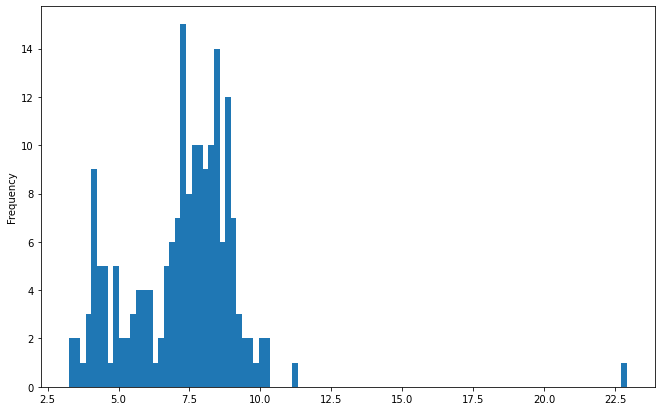

In [14]:
# plotting the viewership distribution 
fig, ax = plt.subplots(1, 1, figsize = (11,7))

office['Viewership'].plot.hist(ax = ax, bins = 100)

Histogram above is showing the normal distributions for the viewership data. 

In [15]:
# calculating the mean value for the viewership for all episodes
viewership_mean = office['Viewership'].mean()
viewership_mean

7.246329787234051

In [16]:
# calculating standard deviation
viewership_std = office['Viewership'].std()
viewership_std

2.066011641923279

<AxesSubplot:ylabel='Frequency'>

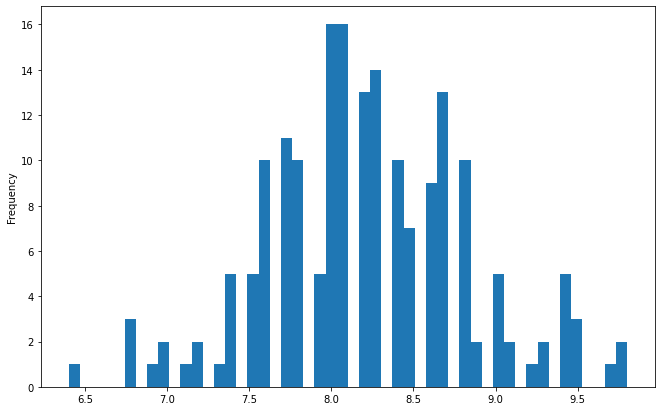

In [17]:
# plotting the IMBD ratings distribution 
fig, ax = plt.subplots(1, 1, figsize = (11,7))

office['imdb_rating'].plot.hist(ax = ax, bins = 50)

Histogram above is showing the normal distributions for the imdb ratings data.

In [18]:
# calculating the mean value of the imdb scores for all episodes
imdb_rating_mean = office['imdb_rating'].mean()
imdb_rating_mean

8.219148936170212

The mean value of IMDB scores for all episodes is 8.22, thus beta0 is 8.22. 

In [19]:
# calculating standard deviation
imdb_rating_std = office['imdb_rating'].std()
imdb_rating_std

0.6153606995361512

The standard deviation value of the distribution is 0.615. 

<AxesSubplot:ylabel='Frequency'>

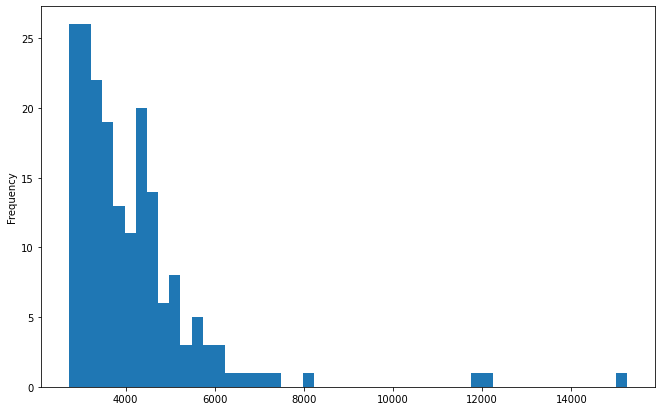

In [20]:
# plotting the distribution for total votes 
fig, ax = plt.subplots(1, 1, figsize = (11,7))

office['total_votes'].plot.hist(ax = ax, bins = 50)

Histogram above is showing the exponentinal distributions for the total voting data.

In [21]:
# calculating the mean value of the total votes for all episodes
total_votes_mean = office['total_votes'].mean()
total_votes_mean

4119.196808510638

Variable Michael_in has a binomal distribution (yes/no). [[1]](#References)

## Relationships between variables

Text(0, 0.5, 'Viewership(mil)')

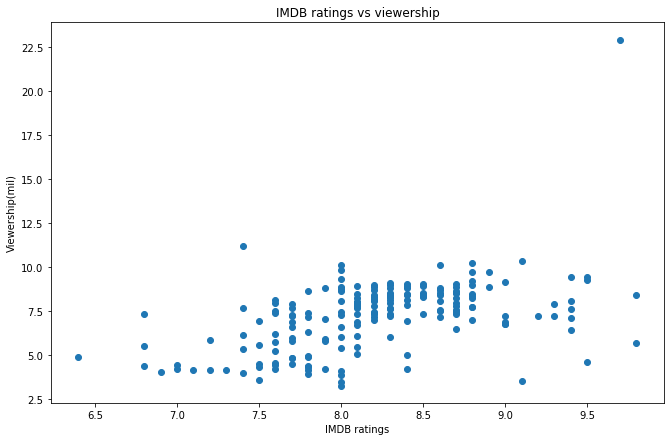

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (11,7))

# plotting the relationship between viewership and imdb ratings 
ax.scatter(y=office['Viewership'], 
           x=office['imdb_rating'],)
ax.set_title("IMDB ratings vs viewership") # setting the title
ax.set_xlabel("IMDB ratings") # setting the x label
ax.set_ylabel("Viewership(mil)") # setting the y label

In [23]:
# Build linear regression model for the above scatter plot
# Split data into predictor X and output Y
y = office[['imdb_rating']]
x = office[['Viewership']]

# Initialise and fit model
lm = LinearRegression()
model1 = lm.fit(x, y)

In [24]:
# print out the beta value
print(f'betas = {model1.coef_}')

betas = [[0.14334054]]


One more viewer increases IMDB rating on average for 0.1433 points, thus beta1 equals 0.14334054. 

Text(0, 0.5, 'Total votes')

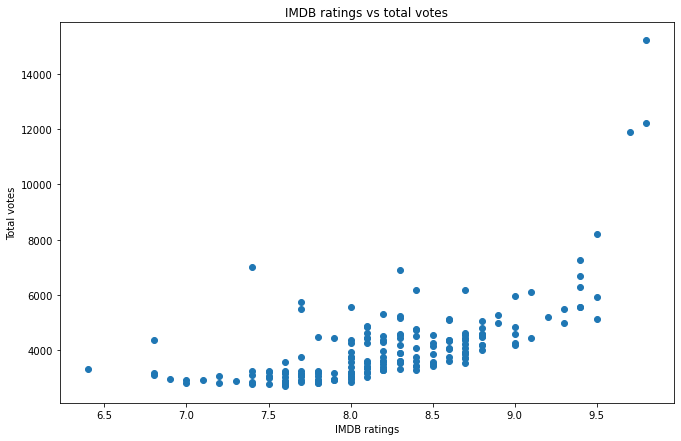

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (11,7))

# plotting the relationship between imdb ratings and total votes  
ax.scatter(y=office['total_votes'], 
           x=office['imdb_rating'],)
ax.set_title("IMDB ratings vs total votes") # setting the title
ax.set_xlabel("IMDB ratings") # setting the x label
ax.set_ylabel("Total votes") # setting the y label

In [26]:
# Build linear regression model for the above scatter plot
# Split data into predictor X and output Y
Y = office[['imdb_rating']]
X = office[['total_votes']]

# Initialise and fit model
lm = LinearRegression()
model2 = lm.fit(X, Y)

In [27]:
# print out the beta value
print(f'betas = {model2.coef_}')

betas = [[0.00025473]]


One more vote increases IMDB rating on average for 0.00025473 points, thus beta2 equals  0.00025473.

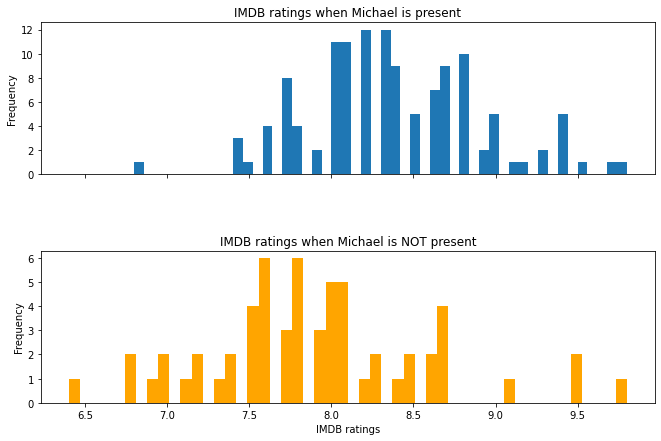

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (11,7), sharex=True)

# plotting the distbution of the imdb ratings along for episodes when Michael is/is not present 
imdb_michael_in = office.loc[office['Michael_in'] == 1, 'imdb_rating']
imdb_no_michael = office.loc[office['Michael_in'] == 0, 'imdb_rating']
imdb_michael_in.plot.hist(ax = ax1, bins = 50)
imdb_no_michael.plot.hist(ax = ax2, bins = 50, color = "Orange")

ax1.set_title("IMDB ratings when Michael is present") # setting the title
ax2.set_title("IMDB ratings when Michael is NOT present") # setting the title
ax1.set_xlabel("IMDB ratings") # setting the x label for ax1 axis
ax2.set_xlabel("IMDB ratings") # setting the x label fro ax1 axis

fig.subplots_adjust(hspace=0.5) # adjusting the space between the axes    a


In [29]:
# mean value of imdb ratings when Michael is present 
imdb_michael_in.mean()

8.366406250000002

In [30]:
# mean value of imdb ratings when Michael is not present 
imdb_no_michael.mean()

7.905000000000001

Episodes where Michael is present have on average 0.46 higher IMDB score that episode where Michael is not present, thus beta3 equals 0.46. 

## Recreating syntetic dataset

In [31]:
# seeding the number generator
rng = np.random.default_rng()
# number of records
n = 188
# recreating syntetic data for each variable without taking into consideration beta's effect
success =  rng.normal(loc=imdb_rating_mean, scale=imdb_rating_std, size=n)
viewership = rng.normal(loc=viewership_mean, scale=viewership_std, size=n)
total_votes = rng.exponential(scale=total_votes_mean, size=n) 
michael_presence = np.random.choice([1, 0], size=n, p=[0.5, 0.5])

In [32]:
# importing data into a DataFrame 
success_without_effect = pd.DataFrame({"success": success, 
                         "viewership": viewership, 
                         "total_votes": total_votes, 
                        "michael_presence": michael_presence}
                         )
# dataframe without the regression effect
success_without_effect 

,success,viewership,total_votes,michael_presence
0,7.487966,4.970529,11555.188407,1
1,8.412917,4.280946,3630.202632,0
2,7.952008,10.527851,1014.080962,0
3,7.017440,4.402080,6865.686729,0
4,7.734210,8.131153,359.982911,1
...,...,...,...,...
183,8.028823,7.281147,5554.161646,1
184,8.532236,6.237242,13597.940086,0
185,8.594325,4.994548,3301.276169,1
186,8.560200,5.145196,3222.623672,0


In [33]:
# additional column for the success with the beta effect
success_without_effect['success_modified'] = imdb_rating_mean + (0.14334054*viewership) + (0.00025473*total_votes) + (0.46*michael_presence)
# selecting the relevant columns
success_with_effect = success_without_effect[['success_modified', 'viewership', 'total_votes', 'michael_presence']]
success_with_effect.head()

,success_modified,viewership,total_votes,michael_presence
0,12.335080,4.970529,11555.188407,1
1,9.757503,4.280946,3630.202632,0
2,9.986534,10.527851,1014.080962,0
3,10.599042,4.402080,6865.686729,0
4,9.936371,8.131153,359.982911,1


## References
1. Heiss, A. (2020, November 4). The ultimate guide to generating synthetic data for causal inference. Program Evaluation. Retrieved December 11, 2021, from https://evalf20.classes.andrewheiss.com/example/synthetic-data/
2. Brownlee, J. (2020, January 10). How to Generate Test Datasets in Python with scikit-learn. Machine Learning Mastery. Retrieved December 11, 2021, from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
3. The Office Dataset. (2020, September 8). Kaggle. Retrieved December 12, 2021, from https://www.kaggle.com/nehaprabhavalkar/the-office-dataset
4. The Office (US) - Complete Dialogue/Transcript. (2021, January 18). Kaggle. Retrieved December 12, 2021, from https://www.kaggle.com/nasirkhalid24/the-office-us-complete-dialoguetranscript
5. The Office Episodes Data. (2021, November 8). Kaggle. Retrieved December 12, 2021, from https://www.kaggle.com/bcruise/the-office-episodes-data
6. Frost, J. (2021, November 18). How to Identify the Distribution of Your Data. Statistics By Jim. Retrieved December 18, 2021, from https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/
7. P. (2021, January 4). Pandas - Merge DataFrames on Multiple Columns. Data Science Parichay. Retrieved December 21, 2021, from https://datascienceparichay.com/article/pandas-merge-dataframes-on-multiple-columns/
8. pandas.DataFrame.merge — pandas 1.3.5 documentation. (n.d.). Pandas. Retrieved December 21, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
9. Merge, join, concatenate and compare — pandas 1.3.5 documentation. (n.d.). Pandas. Retrieved December 21, 2021, from https://pandas.pydata.org/docs/user_guide/merging.html#merging
10. pandas.Series.fillna — pandas 1.3.5 documentation. (n.d.). Pandas. Retrieved December 23, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
11. Set y axis limit in Pandas histogram. (2016, July 17). Stack Overflow. Retrieved December 23, 2021, from https://stackoverflow.com/questions/38424459/set-y-axis-limit-in-pandas-histogram
12. Li, L. (2019, February 5). Introduction to Linear Regression in Python - Towards Data Science. Medium. Retrieved December 23, 2021, from https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
13. Linear Regression With Python scikit Learn | GreyCampus. (2021, October 12). GreyCampus. Retrieved December 23, 2021, from https://www.greycampus.com/blog/data-science/linear-regression-with-python-scikit-learn
14. numpy.power — NumPy v1.21 Manual. (n.d.). NumPy. Retrieved December 24, 2021, from https://numpy.org/doc/stable/reference/generated/numpy.power.html
15. How to randomly append “Yes/No” (ratio of 7:3) to a column in pandas dataframe? (2016, May 19). Stack Overflow. Retrieved December 24, 2021, from https://stackoverflow.com/questions/37331127/how-to-randomly-append-yes-no-ratio-of-73-to-a-column-in-pandas-dataframe
16. GeeksforGeeks. (2020, July 28). Replace the column contains the values “yes” and “no” with True and False In Python-Pandas. Retrieved December 25, 2021, from https://www.geeksforgeeks.org/replace-the-column-contains-the-values-yes-and-no-with-true-and-false-in-python-pandas/

## End